<a href="https://colab.research.google.com/github/jacquelsn/IA-/blob/https%2Fcolab.research.google.com%2Fdrive%2F1cMPkWtq0mPav13-Sn3uc-BxjSmrcSYLY/N_gramas_TFIDF_e_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N-gramas, TF-IDF e uso de redes neurais

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import pandas as pd
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1ZlZsxrMHhZZb9ZTYABOiWw7bCPofY6cz&export=download', header=0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Existem valores nulos nesse dataset

In [4]:
	df.isnull().sum()

review       0
sentiment    0
dtype: int64

Quantidade de exemplos positivos e negativos

In [5]:
	df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Plotar essa relação

<Axes: title={'center': 'Quantidade por Tipo'}>

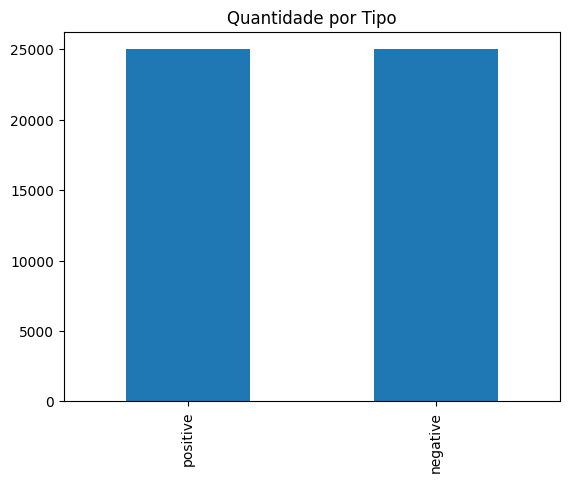

In [6]:
 df["sentiment"].value_counts().plot.bar(title='Quantidade por Tipo',rot=90)

Pré-processamento do texto com NLTK

In [7]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
exemplo = df['review'].values[0]
print(exemplo)
print(len(exemplo.split()))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [9]:
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)
def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    return palavras
exemplo_preparado = prepara(exemplo)
print(exemplo_preparado)
print(len(exemplo_preparado))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['One', 'reviewers', 'mentioned', 'watching', '1', 'Oz', 'episode', "'ll", 'hooked', 'They', 'right', 'exactly', 'happened', 'me.', 'br', 'br', 'The', 'first', 'thing', 'struck', 'Oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'GO', 'Trust', 'show', 'faint', 'hearted', 'timid', 'This', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'Its', 'hardcore', 'classic', 'use', 'word.', 'br', 'br', 'It', 'called', 'OZ', 'nickname', 'given', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'Emerald', 'City', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'Em', 'City', 'home', 'many', '..', 'Aryans', 'Muslims', 'gangstas', 'Latinos', 'Christians', 'Italians', 'Irish', '....', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away.', 'br', 'br', 'I', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 

In [10]:
from nltk.tokenize import word_tokenize
import string
stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)
TAMANHO_MIMINO = 1
IGNORAR = ['...', 'br','.so','\'ll']
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
def prepara(texto):
    palavras = [i for i in word_tokenize(texto, language='english') if i not in punctuations]
    palavras = [i for i in palavras if i not in stopwords]
    palavras = [i for i in palavras if len(i) > TAMANHO_MIMINO]
    palavras = [i for i in palavras if i not in IGNORAR]
    palavras = [stemmer.stem(i) for i in palavras]
    return palavras
exemplo_preparado = prepara(exemplo)
print(exemplo_preparado)
print(len(exemplo_preparado))

['one', 'review', 'mention', 'watch', 'oz', 'episod', 'hook', 'they', 'right', 'exact', 'happen', 'me.', 'the', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'heart', 'timid', 'this', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violenc', 'it', 'hardcor', 'classic', 'use', 'word.', 'it', 'call', 'oz', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'it', 'focus', 'main', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'em', 'citi', 'home', 'mani', '..', 'aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '....', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goe', 'show', 'would', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstream', 'audienc', 'forget', 'c

In [11]:
%%time
df['review2'] = df['review'].apply(prepara)
df['review2'] = df['review2'].apply(' '.join)

CPU times: user 4min 9s, sys: 919 ms, total: 4min 9s
Wall time: 4min 53s


In [12]:
	df.head()

,review,sentiment,review2
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product the film techniqu unassum...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy jake think 's zombi ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...


In [13]:
	from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review2'], df['sentiment'], test_size=0.2, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (40000,)
y_train shape: (40000,)
X_test shape: (10000,)
y_test shape: (10000,)


In [14]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,1))
bow_x_train = cv.fit_transform(X_train)
bow_x_test = cv.transform(X_test)
print('bow_X_train shape:',bow_x_train.shape)
print('bow_X_test shape:',bow_x_test.shape)

bow_X_train shape: (40000, 32224)
bow_X_test shape: (10000, 32224)
CPU times: user 7.25 s, sys: 83.5 ms, total: 7.33 s
Wall time: 9.74 s


In [15]:
	from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ohe_y_train = lb.fit_transform(y_train)
ohe_y_test = lb.fit_transform(y_test)
print('ohe_y_train shape:',ohe_y_train.shape)
print('ohe_y_test shape:',ohe_y_test.shape)

ohe_y_train shape: (40000, 1)
ohe_y_test shape: (10000, 1)


Uso de modelos de machine learning

In [16]:
	%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=500, random_state=42)
CPU times: user 817 ms, sys: 800 ms, total: 1.62 s
Wall time: 1.35 s


In [17]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = lr.predict(bow_x_test)
print("LogReg Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score : 0.5417
              precision    recall  f1-score   support

    Positive       0.53      0.89      0.66      5035
    Negative       0.63      0.19      0.29      4965

    accuracy                           0.54     10000
   macro avg       0.58      0.54      0.48     10000
weighted avg       0.58      0.54      0.48     10000



In [18]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [19]:
#*!pip show scikit-learn # para ver qual versão e onde o scikit-learn está instalado
#*!pip freeze # para ver todos os pacotes instalados no virtualenv ativo
#*import sklearn; sklearn.show_versions()

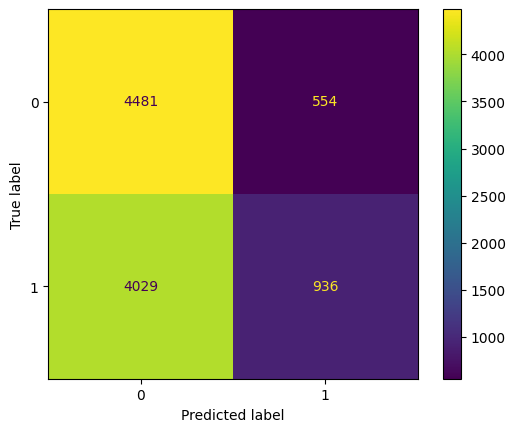

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator (lr, bow_x_test, ohe_y_test, values_format='d');

In [21]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(bow_x_train,ohe_y_train.ravel())
svm

SGDClassifier(random_state=42)

In [22]:
	y_predict = svm.predict(bow_x_test)
print("SVM Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

SVM Score : 0.5422
              precision    recall  f1-score   support

    Positive       0.53      0.89      0.66      5035
    Negative       0.63      0.18      0.29      4965

    accuracy                           0.54     10000
   macro avg       0.58      0.54      0.47     10000
weighted avg       0.58      0.54      0.48     10000



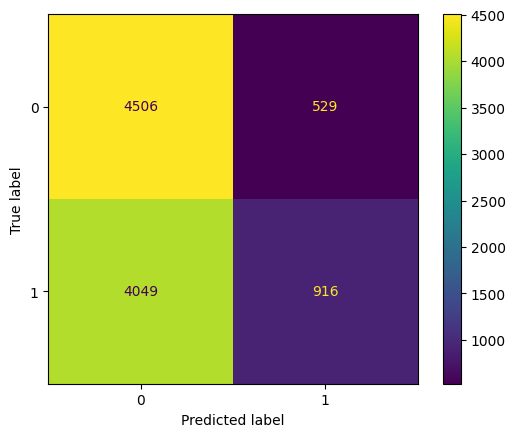

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm, bow_x_test, ohe_y_test, values_format='d');

N-gramas

In [24]:
	%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(2,2))
bow_x_train = cv.fit_transform(X_train)
bow_x_test = cv.transform(X_test)
print('bow_x_train shape:',bow_x_train.shape)
print('bow_x_test shape:',bow_x_test.shape)

bow_x_train shape: (40000, 1740081)
bow_x_test shape: (10000, 1740081)
CPU times: user 25.5 s, sys: 324 ms, total: 25.8 s
Wall time: 34.3 s


N-grama = 2 (bigram)

In [25]:
	%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(2,2))
bow_x_train = cv.fit_transform(X_train)
bow_x_test = cv.transform(X_test)
print('bow_x_train shape:',bow_x_train.shape)
print('bow_x_test shape:',bow_x_test.shape)

bow_x_train shape: (40000, 1740081)
bow_x_test shape: (10000, 1740081)
CPU times: user 20.7 s, sys: 186 ms, total: 20.9 s
Wall time: 23.5 s


Regressão Logística:

In [27]:
	%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=500, random_state=42)
CPU times: user 19.5 s, sys: 9.69 s, total: 29.2 s
Wall time: 23.6 s


In [28]:
	y_predict = lr.predict(bow_x_test)
print("LogReg Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score : 0.6738
              precision    recall  f1-score   support

    Positive       0.65      0.78      0.71      5035
    Negative       0.72      0.57      0.63      4965

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



SGDClassifier:

In [29]:
 %%time
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(bow_x_train,ohe_y_train.ravel())
print(svm)

SGDClassifier(random_state=42)
CPU times: user 341 ms, sys: 55.6 ms, total: 397 ms
Wall time: 415 ms


In [30]:
	y_predict = svm.predict(bow_x_test)
print("SVM Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

SVM Score : 0.6851
              precision    recall  f1-score   support

    Positive       0.68      0.70      0.69      5035
    Negative       0.69      0.67      0.68      4965

    accuracy                           0.69     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.69      0.69     10000



N-grama = 3 (trigram)

In [31]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(3,3))
bow_x_train = cv.fit_transform(X_train)
bow_x_test = cv.transform(X_test)
print('bow_x_train shape:',bow_x_train.shape)
print('bow_x_test shape:',bow_x_test.shape)

bow_x_train shape: (40000, 4318578)
bow_x_test shape: (10000, 4318578)
CPU times: user 32.4 s, sys: 735 ms, total: 33.1 s
Wall time: 33.3 s


Regressão Logística:

In [34]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr.fit(bow_x_train,ohe_y_train.ravel())
print(lr)

LogisticRegression(C=1, max_iter=500, random_state=42)
CPU times: user 58 s, sys: 28.4 s, total: 1min 26s
Wall time: 1min 1s


In [35]:
y_predict = lr.predict(bow_x_test)
print("LogReg Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

LogReg Score : 0.5686
              precision    recall  f1-score   support

    Positive       0.54      0.99      0.70      5035
    Negative       0.92      0.14      0.25      4965

    accuracy                           0.57     10000
   macro avg       0.73      0.57      0.47     10000
weighted avg       0.73      0.57      0.47     10000



SGDClassifier:

In [36]:
	%%time
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', random_state=42)
svm.fit(bow_x_train,ohe_y_train.ravel())
print(svm)

SGDClassifier(random_state=42)
CPU times: user 735 ms, sys: 108 ms, total: 842 ms
Wall time: 722 ms


In [37]:
	y_predict = svm.predict(bow_x_test)
print("SVM Score :",accuracy_score(ohe_y_test , y_predict))
print(classification_report(ohe_y_test, y_predict, target_names=['Positive','Negative']))

SVM Score : 0.5646
              precision    recall  f1-score   support

    Positive       0.54      0.99      0.70      5035
    Negative       0.93      0.13      0.23      4965

    accuracy                           0.56     10000
   macro avg       0.73      0.56      0.46     10000
weighted avg       0.73      0.56      0.47     10000

